In [1]:
import keras
from keras.utils import to_categorical
import pandas as pd
from keras import regularizers
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
# Plot loss function
def plot_loss(history, metric='loss', skip=0):
    plt.plot(history.history[metric][skip:])
    plt.plot(history.history['val_'+metric][skip:])
    plt.title('model loss')
    plt.ylabel(metric)
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [10]:
# Load data
data = pd.read_csv("../data/output.csv")
data.dropna(inplace=True)
X = data.iloc[:, 1:-1]
# Have a look
#print(X.head(5))
y = data.iloc[:, -1].astype(int).copy()
#print(y.head(5))

In [11]:
for i in range(len(y)):
    if y[i] < 5: 
        y[i] = 0
    elif y[i] < 7:
        y[i] = 1
    elif y[i] < 9:
        y[i] = 2
    else: 
        y[i] = 3

In [12]:
y = to_categorical(y, dtype=int)

In [13]:
y.shape

(155, 4)

In [14]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [15]:
X_train.shape

(124, 107)

In [39]:
model = keras.Sequential()
model.add(keras.layers.Dense(32, input_shape=[X.shape[1]], 
                             kernel_regularizer=regularizers.l2(0.6)
                            ))
# model.add(keras.layers.Dense(32))
model.add(keras.layers.Dense(4, 
                             kernel_regularizer=regularizers.l2(0.6)
                            ))
model.add(keras.layers.Dense(y.shape[1], activation="softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 32)                3456      
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 132       
_________________________________________________________________
dense_18 (Dense)             (None, 4)                 20        
Total params: 3,608
Trainable params: 3,608
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [41]:
history = model.fit(X, y, epochs=500, validation_split=0.3, shuffle=True, verbose=0)

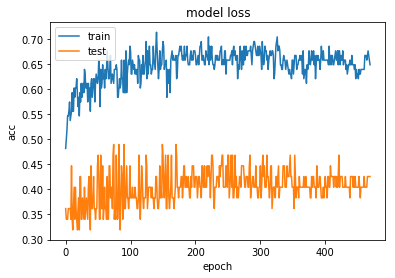

In [42]:
plot_loss(history, metric='acc', skip=30)

In [9]:
history.history["val_mean_absolute_error"][-5:]

[1.7492523749669393,
 1.8514061742358738,
 1.820289052857293,
 1.8636879709031846,
 1.839745299021403]